# Exercise Chapter 3 
Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import factorial
import statsmodels.formula.api as smf
import mistat
import matplotlib.pyplot as plt

# Exercise 1

In [3]:
from scipy.special import binom
def probRuns(m1, m2, R):
    n = m1 + m2
    k = R // 2
    if R % 2:
        denom = binom(m1-1,k-1) * binom(m2-1,k) + binom(m1-1,k) * binom(m2-1,k-1)
        return denom / binom(n, m2)
    else:
        return 2 * binom(m1-1, k-1) * binom(m2-1, k-1) / binom(n, m2)

In [4]:
n = 25
m2 = 10
m1 = n - m2

df = pd.DataFrame({
    'R': range(0, n+1),
    'p.d.f': [probRuns(m1, m2, R) for R in range(0, n+1)],
})
df['c.d.f'] = np.cumsum(df['p.d.f'])

In [5]:
cdf = df['c.d.f'].values

Q1 = np.where(cdf < 0.25)[0][-1]
Me = np.where(cdf < 0.5)[0][-1]
Q3 = np.where(cdf < 0.75)[0][-1]
print(Q1, Me, Q3)

10 12 14


In [6]:
mu_R = 1 + 2 * m1 * m2 / n
sigma_R = np.sqrt(2*m1*m2*(2*m1*m2 - n) / (n*n*(n-1)))
print(mu_R, sigma_R)

13.0 2.345207879911715


In [7]:
p = df['c.d.f'][16] - df['c.d.f'][9]
print(p)

0.8656750572082381


In [8]:
print(stats.norm.cdf((16.5-mu_R)/sigma_R) - stats.norm.cdf((9.5-mu_R)/sigma_R))

0.8644069987336978


# Exercise 2

In [9]:
data = mistat.load_data('CYCLT')
# convert to up (1) or down (0) information relative to mean
mean_ct = np.mean(data)
runs = [1 if ct > mean_ct else 0 for ct in data]

# determine number of runs
obs_Runs = 0
current = None
for r in runs:
    if r != current:
        obs_Runs += 1
        current = r
print(f'Observed number of runs: {obs_Runs}')

# calculate expected number of runs
m1 = sum(data > mean_ct)
m2 = sum(data <= mean_ct)
n = m1 + m2
mu_R = 1 + 2 * m1 * m2 / n
print(f'Expected number of runs {mu_R:.2f}')

# determine if difference is significant
mistat.runsTest(data, cutoff=np.mean(data))

Observed number of runs: 26
Expected number of runs 25.64


Result(statistic=0.1044134517056721, pval=0.9168412481142088, method='Runs Test', alternative='two.sided')

# Exercise 3

In [10]:
n = 50
mu_Rstar = (2*n-1)/3
print(mu_Rstar)

33.0


In [11]:
# determine direction of change up (1) or down (-1)
y = [1 if xi < xip1 else -1 for xi, xip1 in zip(data[:-1], data[1:])]

# count number of up and down runs
up = 0
down = 0
current = None
for yi in y:
    if yi == current: # no change of direction
        continue
    if yi < 0:
        down += 1
    else:
        up += 1
    current = yi
Rstar = up + down
print(Rstar, up, down)

34 17 17


In [12]:
n = 50
mu_Rstar = (2*n-1)/3
sigma_Rstar = np.sqrt((16*n-29)/90)
print(sigma_Rstar)
alpha_L = stats.norm.cdf((Rstar-mu_Rstar)/sigma_Rstar)
alpha_U = 1 - alpha_L
print(alpha_U, alpha_L)

2.9268868558020253
0.3663034098961011 0.6336965901038989


In [13]:
def expected_R_k(n, k):
    return 2 *(n*(k+1) - k*k - k + 1)/factorial(k+2)

print(expected_R_k(50, 5))
# probability to have run greater than 5
print(1 - np.exp(-expected_R_k(50, 5)))

0.10753968253968255
0.10195911479934461


In [14]:
mistat.runStatistics(data)

{'count': {'mu_R': 25.64, 'sigma_R': 3.4478316167038754, 'observed': 26},
 'direction': {'mu_Rstar': 33.0,
  'sigma_Rstar': 2.9268868558020253,
  'up': 17,
  'down': 17,
  'Rstar': 34,
  'alpha': [0.3663034098961011, 0.6336965901038989]}}

# Exercise 4

In [15]:
data = mistat.load_data('YARNSTRG')
mistat.runStatistics(data)

{'count': {'mu_R': 50.92, 'sigma_R': 4.966642668235696, 'observed': 49},
 'direction': {'mu_Rstar': 66.33333333333333,
  'sigma_Rstar': 4.1779846284489315,
  'up': 32,
  'down': 32,
  'Rstar': 64,
  'alpha': [0.28825730949895256, 0.7117426905010474]}}

In [16]:
mistat.runsTest(data, cutoff=data.mean())

Result(statistic=-0.3865790491189181, pval=0.6990678707195341, method='Runs Test', alternative='two.sided')

# Exercise 5

In [17]:
parameter = pd.DataFrame({
    'm': [60],
    's': [0.02],
    'k': [5_000],
    't': [296],
    'p0': [110_000],
    'v0': [0.01],
    't0': [360],
})
simulator = mistat.PistonSimulator(parameter=parameter, n_simulation=50, n_replicate=5, seed=1236)
# simulator = mistat.PistonSimulator(n_simulation=50, n_replicate=5, seed=1)
Ps = simulator.simulate()

# get grouped cycle times
cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
mistat.runsTest(np.mean(cycleTime, axis=1), np.mean(cycleTime))

Result(statistic=-0.5610330087428953, pval=0.5747750350233831, method='Runs Test', alternative='two.sided')

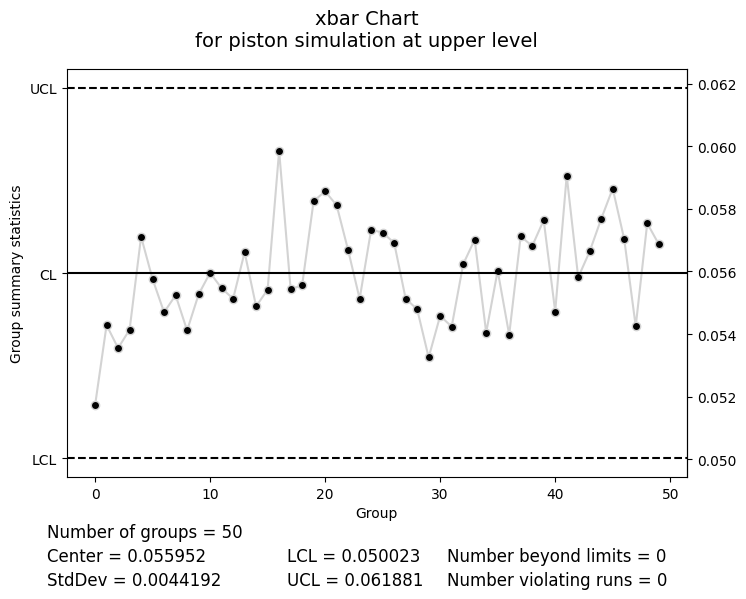

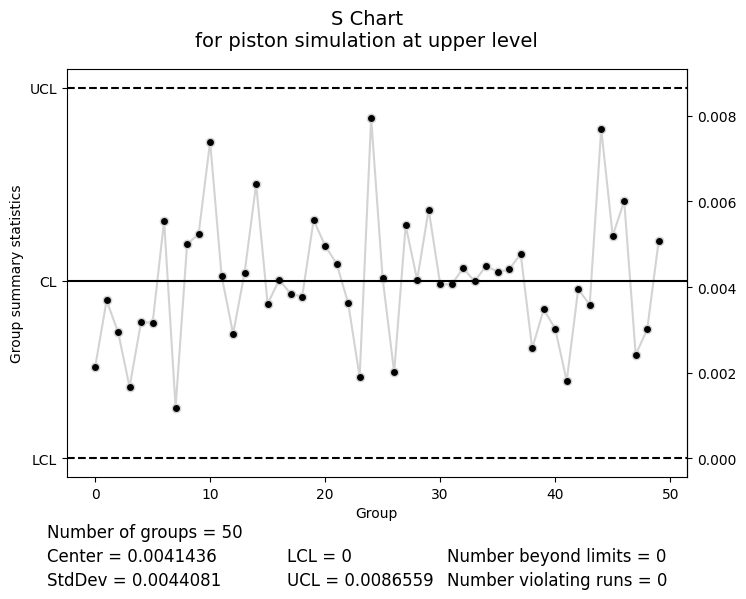

In [18]:
qcc = mistat.QualityControlChart(cycleTime, qcc_type='xbar')
ax = qcc.plot(title='for piston simulation at upper level')
plt.show()
qcc = mistat.QualityControlChart(cycleTime, qcc_type='S')
ax = qcc.plot(title='for piston simulation at upper level')
plt.show()

# Exercise 6

In [19]:
parameter = pd.DataFrame({
    'm': [60]*50,
    's': [0.02]*50,
    'k': [5_000]*50,
    't': [296] * 16 + [296 * 1.1**i for i in range(1, 35)],
    'p0': [110_000]*50,
    'v0': [0.01]*50,
    't0': [360]*50,
})

simulator = mistat.PistonSimulator(parameter=parameter, n_simulation=50, 
                                   n_replicate=5, seed=1, check=False)
Ps = simulator.simulate()
cycleTimeTshift = mistat.qcc_groups(Ps['seconds'], Ps['group'])

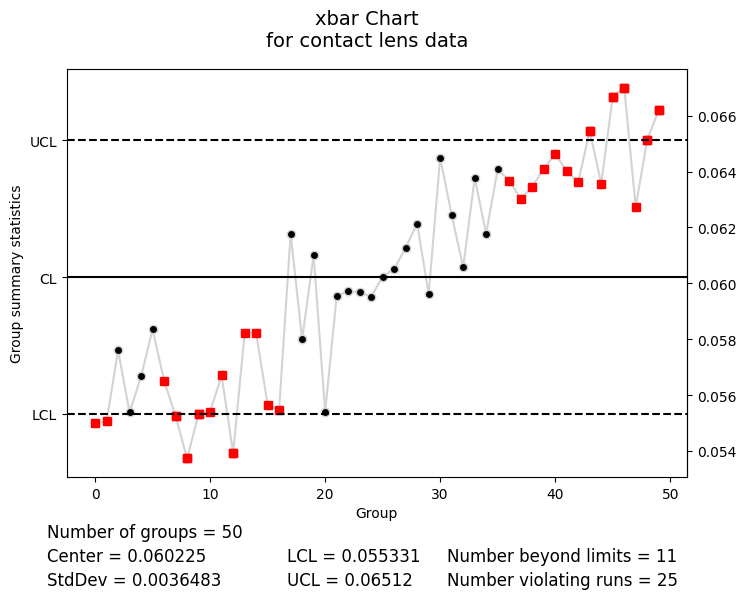

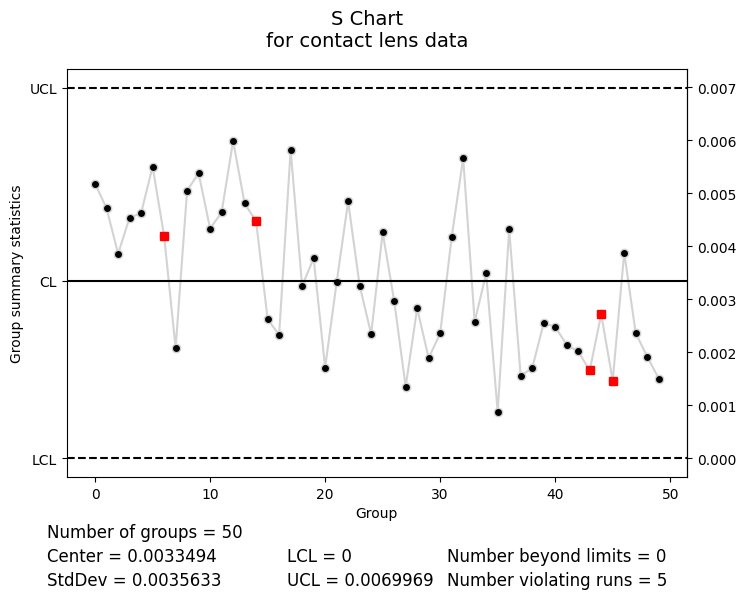

In [20]:
qcc = mistat.QualityControlChart(cycleTimeTshift, qcc_type='xbar')
ax = qcc.plot(title='for contact lens data')
plt.show()
qcc = mistat.QualityControlChart(cycleTimeTshift, qcc_type='S')
ax = qcc.plot(title='for contact lens data')
plt.show()

In [21]:
mistat.runStatistics(np.mean(cycleTime, axis=1))

{'count': {'mu_R': 25.96, 'sigma_R': 3.493555583105112, 'observed': 24},
 'direction': {'mu_Rstar': 33.0,
  'sigma_Rstar': 2.9268868558020253,
  'up': 16,
  'down': 16,
  'Rstar': 32,
  'alpha': [0.36630340989610105, 0.6336965901038989]}}

In [22]:
mistat.runStatistics(np.mean(cycleTimeTshift, axis=1))

{'count': {'mu_R': 25.96, 'sigma_R': 3.493555583105112, 'observed': 8},
 'direction': {'mu_Rstar': 33.0,
  'sigma_Rstar': 2.9268868558020253,
  'up': 15,
  'down': 14,
  'Rstar': 29,
  'alpha': [0.08586912144778469, 0.9141308785522153]}}

In [23]:
mistat.runStatistics(np.mean(cycleTime, axis=1))

{'count': {'mu_R': 25.96, 'sigma_R': 3.493555583105112, 'observed': 24},
 'direction': {'mu_Rstar': 33.0,
  'sigma_Rstar': 2.9268868558020253,
  'up': 16,
  'down': 16,
  'Rstar': 32,
  'alpha': [0.36630340989610105, 0.6336965901038989]}}

In [24]:
mistat.runStatistics(np.mean(cycleTimeTshift, axis=1))

{'count': {'mu_R': 25.96, 'sigma_R': 3.493555583105112, 'observed': 8},
 'direction': {'mu_Rstar': 33.0,
  'sigma_Rstar': 2.9268868558020253,
  'up': 15,
  'down': 14,
  'Rstar': 29,
  'alpha': [0.08586912144778469, 0.9141308785522153]}}

In [25]:
print('mean:', mistat.runsTest(np.mean(cycleTime, axis=1), np.mean(cycleTime)).pval)
STD = np.std(cycleTime, axis=1)
print('std:', mistat.runsTest(STD, np.mean(STD)).pval)

mean: 0.5747750350233831
std: 0.2529990614746843


In [26]:
print('mean:', mistat.runsTest(np.mean(cycleTimeTshift, axis=1), np.mean(cycleTimeTshift)).pval)
STD = np.std(cycleTimeTshift, axis=1)
print('std:', mistat.runsTest(STD, np.mean(STD)).pval)

mean: 2.7343384749349e-07
std: 0.09297787599834818


# Exercise 7

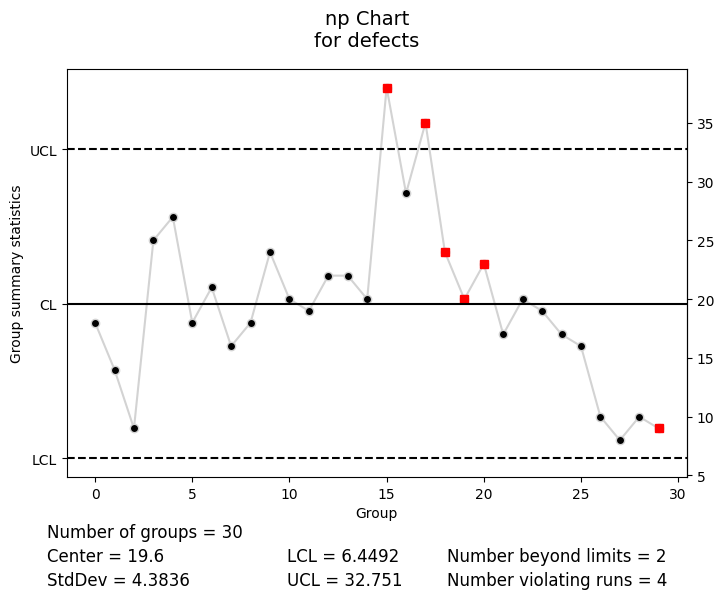

In [27]:
data = pd.Series([18, 14,  9, 25, 27, 18, 21, 16, 18, 24, 20, 19, 22, 22, 20, 
        38, 29, 35, 24, 20, 23, 17, 20, 19, 17, 16, 10,  8, 10,  9])

qcc = mistat.QualityControlChart(data, qcc_type='np', sizes=1000)
ax = qcc.plot(title='for defects')
plt.show()

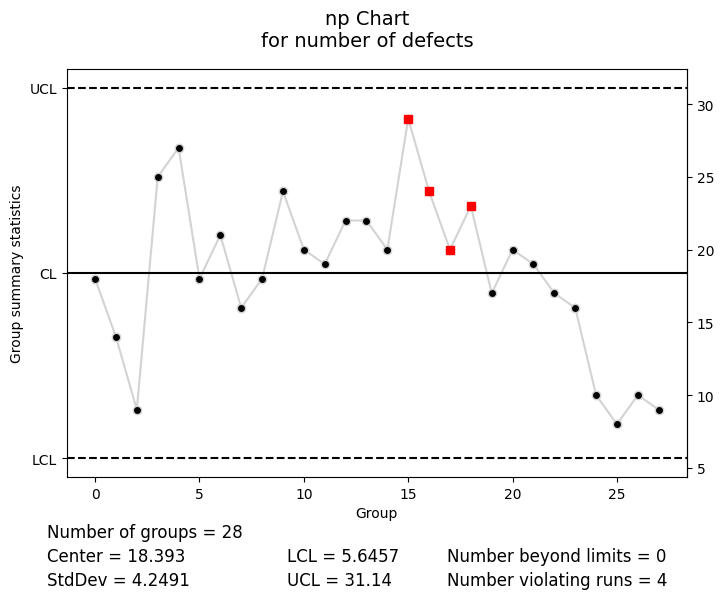

In [28]:
revised = data[data < 32.751]

qcc = mistat.QualityControlChart(revised, qcc_type='np', sizes=1000)
ax = qcc.plot(title='for number of defects')
plt.show()

# Exercise 8

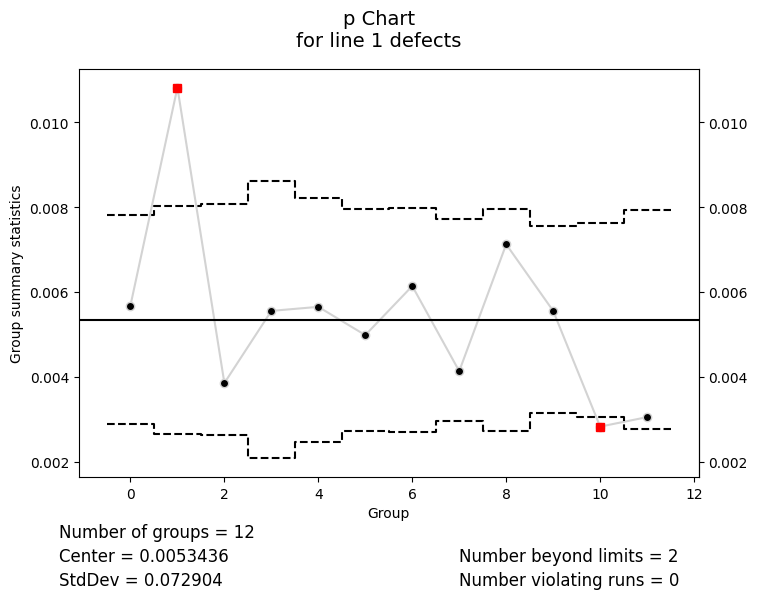

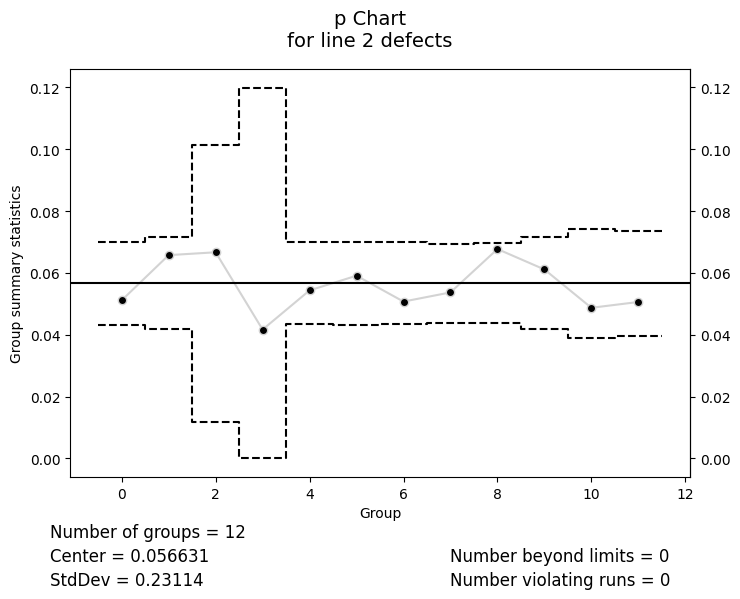

In [29]:
data = pd.DataFrame([
    [1, 45, 7920, 135, 2640],
    [2, 72, 6660, 142, 2160], 
    [3, 25, 6480,  16,  240],
    [4, 25, 4500,   5,  120],
    [5, 33, 5840, 150, 2760],
    [6, 35, 7020, 156, 2640],
    [7, 42, 6840, 140, 2760],
    [8, 35, 8460, 160, 2980],
    [9, 50, 7020, 195, 2880],
    [10,55, 9900, 132, 2160],
    [11,26, 9180,  76, 1560],
    [12,22, 7200,  85, 1680]],
    columns=['Week', 'Line 1 X', 'Line 1 n', 'Line 2 X', 'Line 2 n']
)

qcc = mistat.QualityControlChart(data['Line 1 X'], qcc_type='p', sizes=data['Line 1 n'])
ax = qcc.plot(title='for line 1 defects')
plt.show()

qcc = mistat.QualityControlChart(data['Line 2 X'], qcc_type='p', sizes=data['Line 2 n'])
ax = qcc.plot(title='for line 2 defects')
plt.show()

# Exercise 10

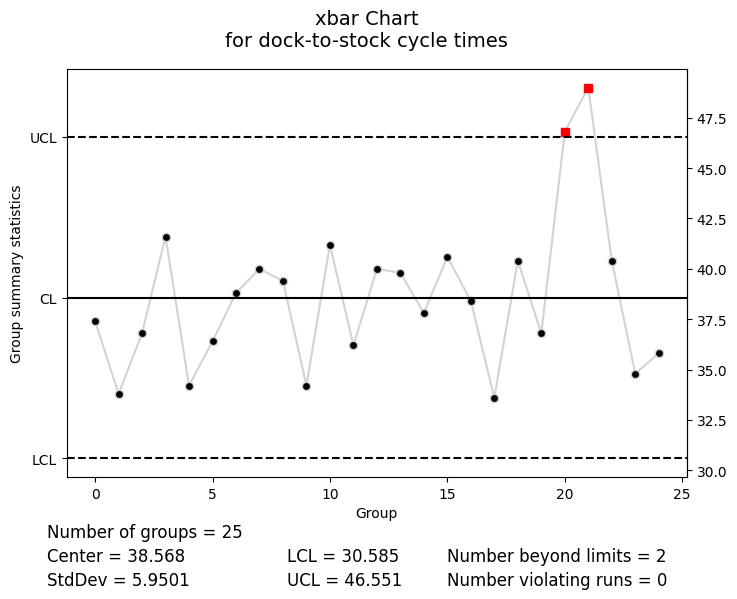

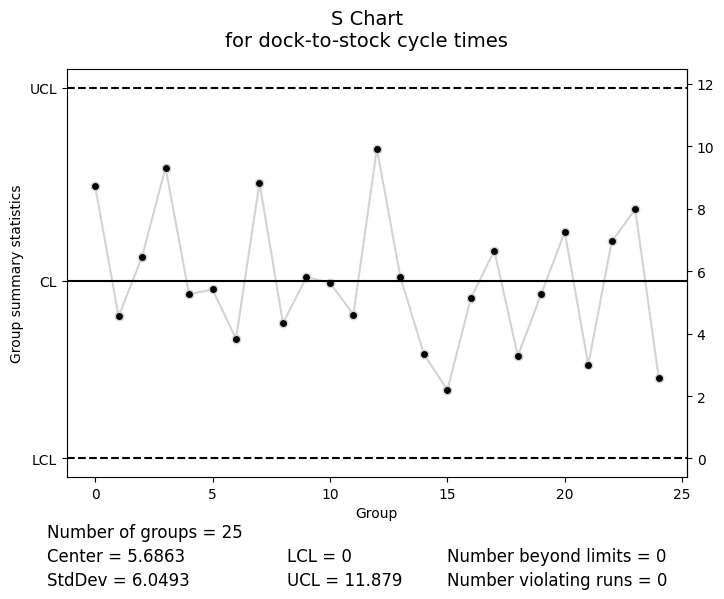

(37.756521739130434,
          LCL        UCL
 0  29.731454  45.781589)

In [30]:
cycleTime = pd.DataFrame([
    [1, 27, 43, 49, 32, 36],      [2, 34, 29, 34, 31, 41],
    [3, 36, 32, 48, 35, 33],      [4, 31, 41, 51, 51, 34],
    [5, 43, 35, 30, 32, 31],      [6, 28, 42, 35, 40, 37],
    [7, 38, 37, 41, 34, 44],      [8, 28, 44, 44, 34, 50],
    [9, 44, 36, 38, 44, 35],      [10, 30, 43, 37, 29, 32],
    [11, 36, 40, 50, 37, 43],     [12, 35, 36, 44, 34, 32],
    [13, 48, 49, 44, 27, 32],     [14, 45, 46, 40, 35, 33],
    [15, 38, 36, 43, 38, 34],     [16, 42, 37, 40, 42, 42],
    [17, 44, 31, 36, 42, 39],     [18, 32, 28, 42, 39, 27],
    [19, 41, 41, 35, 41, 44],     [20, 44, 34, 39, 30, 37],
    [21, 51, 43, 36, 50, 54],     [22, 52, 50, 50, 44, 49],
    [23, 52, 34, 38, 41, 37],     [24, 40, 41, 40, 23, 30],
    [25, 34, 38, 39, 35, 33]],
    columns=['Week', 'S1', 'S2', 'S3', 'S4', 'S5'])
cycleTime = cycleTime.set_index('Week')

qcc = mistat.QualityControlChart(cycleTime, qcc_type='xbar')
ax = qcc.plot(title='for dock-to-stock cycle times')
plt.show()

qcc = mistat.QualityControlChart(cycleTime, qcc_type='S')
ax = qcc.plot(title='for dock-to-stock cycle times')
plt.show()

# exclude points for week 21 and 22
qcc = mistat.QualityControlChart(cycleTime.drop(labels=[21, 22]), qcc_type='xbar')
qcc.center, qcc.limits

In [31]:
statistic, pvalue = stats.ttest_1samp(cycleTime.loc[21,], 45.781, alternative='greater')
print(pvalue)
statistic, pvalue = stats.ttest_1samp(cycleTime.loc[22,], 45.781, alternative='greater')
print(pvalue)

0.3846525285951686
0.03720636409199298


# Exercise 14

In [32]:
def OC_p_chart(p, n, p0):
    c = n * p0
    delta = 3 * np.sqrt(n * p0 * (1 - p0))
    return (stats.binom(n, p).cdf(c + delta) - 
            stats.binom(n, p).cdf(c - delta))
        
p = np.arange(0, 0.505, 0.05)
pd.DataFrame({'p': p, 'OC(p)': OC_p_chart(p, 20, 0.1)})

p     OC(p)
0   0.00  1.000000
1   0.05  0.999966
2   0.10  0.997614
3   0.15  0.978065
4   0.20  0.913307
5   0.25  0.785782
6   0.30  0.608010
7   0.35  0.416625
8   0.40  0.250011
9   0.45  0.129934
10  0.50  0.057659

# Exercise 15

In [33]:
n = 1
while OC_p_chart(0.05, n, 0.01) > 0.1:
    n += 1
n

184

In [34]:
# normal approximation
def OC_p_chart_normal(p, n, p0):
    loc = n * p
    scale = np.sqrt(n*p*(1-p))
    c = n * p0
    delta = 3 * np.sqrt(n * p0 * (1 - p0))
    return (stats.norm(loc, scale).cdf(c + delta) - 
            stats.norm(loc, scale).cdf(c - delta))

# alternative implementation
def OC_p_chart_normal_2(p, n, p0):
    delta = 3 * np.sqrt(p0 * (1 - p0) / n)
    UCL = p0 + delta
    LCL = p0 - delta
    denom = np.sqrt(p * (1 - p) / n)
    return (stats.norm().cdf((UCL - p)/denom) - 
            stats.norm().cdf((LCL - p)/denom))

n = 1
while OC_p_chart_normal(0.05, n, 0.01) > 0.1:
    n += 1
print(n, OC_p_chart_normal(0.05, n, 0.01))

209 0.09959381959080052


# Exercise 17

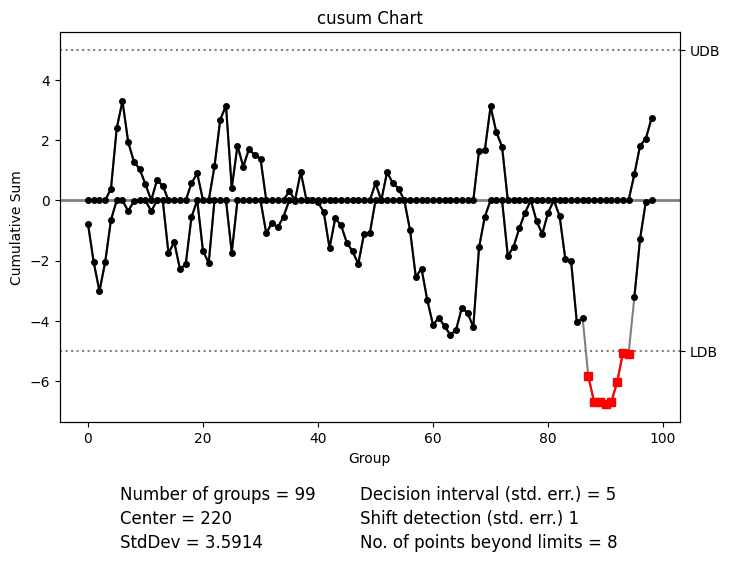

In [35]:
data = mistat.load_data('OELECT')
analysis = mistat.Cusum(data, center=220)
analysis.plot()
plt.show()

# Exercise 18

In [36]:
lambda0 = 15
lambda1_p = 25
lambda1_m = 7
alpha = 0.001
tau = 30
kp = (lambda1_p - lambda0) / np.log(lambda1_p/lambda0)
hp = - np.log(alpha) / np.log(lambda1_p/lambda0)

km = (lambda1_m - lambda0) / np.log(lambda1_m/lambda0)
hm = - np.log(alpha) / np.log(lambda1_m/lambda0)

arl = mistat.cusumPfaCed(randFunc1=stats.poisson(mu=15), 
                         randFunc2=stats.poisson(mu=25), 
                         tau=tau,
                         kp=kp, km=km,
                         hp=hp, hm=hm,
                         N=4000, limit=1000, seed=1)
result = arl['statistic']

PFA 0.01075  CED 2.1663  Std. Error 0.51072


# Exercise 19

In [37]:
mu0 = 100
mu1p = 110
mu1m = 90
sigma = 20
n = 5
alpha = 0.001

Kp = (mu0+mu1p)/2
hp = -(sigma**2 / n) * np.log(alpha) / (mu1p-mu0)
Km = (mu0+mu1m)/2
hm = -(sigma**2 / n) * np.log(alpha) / (mu1m-mu0)

pd.Series({'Kp': Kp, 'hp': hp, 'Km': Km, 'hm': hm})

Kp    105.000000
hp     55.262042
Km     95.000000
hm    -55.262042
dtype: float64

In [38]:
results = []
for tau in [10, 20, 30]:
    arl = mistat.cusumPfaCed(randFunc1=stats.norm(loc=mu0, scale=sigma/np.sqrt(5)), 
                             randFunc2=stats.norm(loc=mu1p, scale=sigma/np.sqrt(5)), 
                             tau=tau, kp=Kp, km=Km, hp=hp, hm=hm,
                             N=300, limit=1000, seed=1, verbose=False)
    results.append({
        'tau': tau,
        **arl['statistic'], # copy all results from arl['statistic']
    })
pd.DataFrame(results)

tau       PFA        CED  Std. Error
0   10  0.000000  10.090000    1.050516
1   20  0.003333  10.076923    1.671984
2   30  0.006667  10.449664    2.289643

In [39]:
n = 20
hp = -(sigma**2 / n) * np.log(alpha) / (mu1p-mu0)
hm = -(sigma**2 / n) * np.log(alpha) / (mu1m-mu0)

results = []
for tau in [10, 20, 30]:
    arl = mistat.cusumPfaCed(randFunc1=stats.norm(loc=mu0, scale=sigma/np.sqrt(5)), 
                             randFunc2=stats.norm(loc=mu1p, scale=sigma/np.sqrt(5)), 
                             tau=tau, kp=Kp, km=Km, hp=hp, hm=hm,
                             N=300, limit=1000, seed=1, verbose=False)
    results.append({
        'tau': tau,
        **arl['statistic'], # copy all results from arl['statistic']
    })
pd.DataFrame(results)

tau       PFA       CED  Std. Error
0   10  0.586667  1.709677    1.056345
1   20  0.806667  2.172414    2.910490
2   30  0.920000  2.250000    6.583663

# Exercise 21

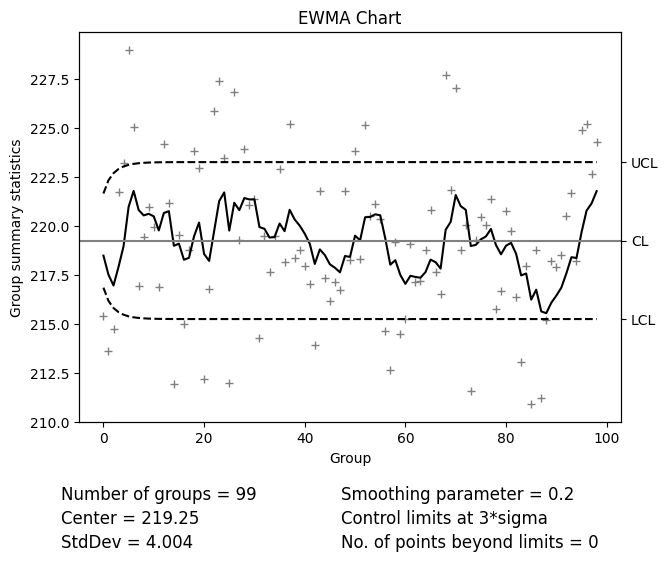

In [40]:
data = mistat.load_data('OELECT')
ewma = mistat.EWMA(data, center=data.mean(), std_dev=data.std(), 
                   sizes=1, smooth=0.2, nsigmas=3)
ewma.plot()
plt.show()

# Exercise 22

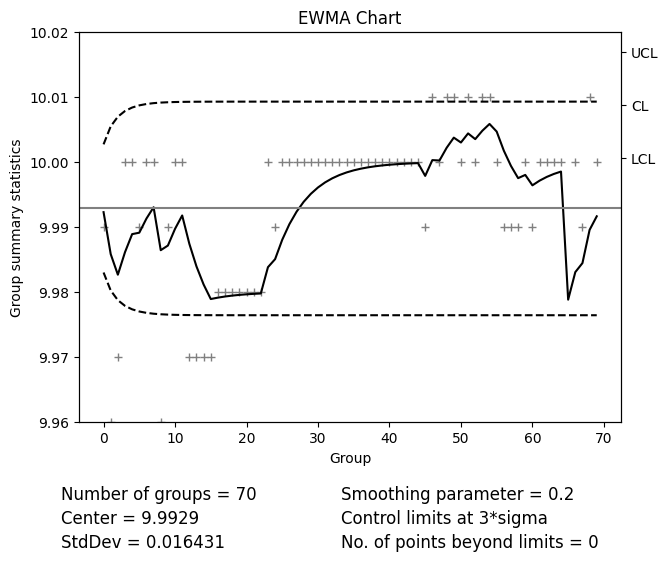

In [41]:
data = mistat.load_data('ALMPIN')
data = data['diam1']
ewma = mistat.EWMA(data, center=data.mean(), std_dev=data.std(), 
                   sizes=1, smooth=0.2, nsigmas=3)
ax = ewma.plot()
ax.set_ylim(9.96, 10.02)
plt.show()

# Exercise 23

In [42]:
dow1941 = mistat.load_data('DOW1941')
# solve the regression equation
m = 50
sqrt_t = np.sqrt(range(1, m + 1))
df = pd.DataFrame({
    'Ut': dow1941[:m]/sqrt_t,
    'x1t': 1 / sqrt_t,
    'x2t': sqrt_t,
})
model = smf.ols(formula='Ut ~ x1t + x2t - 1', data=df).fit()
mu0, delta = model.params
var_eta = np.var(model.resid, ddof=2)
pd.Series({'mu0': mu0, 'delta': delta, 'Var(eta)': var_eta})

mu0         132.808555
delta        -0.255630
Var(eta)      0.297616
dtype: float64

In [43]:
# choose sig2e and w20
sig2e = 0.15
w20 = 0.0015
# apply the filter
results = []
mu_tm1 = mu0
w2_tm1 = w20
y_tm1 = mu0
for i in range(0, len(dow1941)):
    y_t = dow1941[i]
    B_t = sig2e / (var_eta + w2_tm1)
    mu_t = B_t * (mu_tm1 + delta) + (1 - B_t) * y_t # X
    results.append({
        't': i + 1,
        'y_t': y_t,
        'mu_t': mu_t,
        'B_t': B_t,
        'W2_t': w2_tm1,
    })
    w2_tm1 = B_t * (var_eta - sig2e + w2_tm1)
    mu_tm1 = mu_t
    y_tm1 = y_t
results = pd.DataFrame(results)

In [44]:
results.head(25)

t     y_t        mu_t       B_t      W2_t
0    1  131.13  131.843566  0.501478  0.001500
1    2  130.57  130.980023  0.402799  0.074778
2    3  132.01  131.511955  0.387400  0.089580
3    4  132.40  131.959567  0.385103  0.091890
4    5  132.83  132.396733  0.384763  0.092235
5    6  133.02  132.681878  0.384712  0.092286
6    7  133.02  132.791581  0.384705  0.092293
7    8  133.39  133.061444  0.384704  0.092294
8    9  133.59  133.288321  0.384704  0.092294
9   10  133.49  133.314072  0.384704  0.092294
10  11  133.25  133.176307  0.384704  0.092294
11  12  132.44  132.624918  0.384704  0.092294
12  13  131.51  131.840572  0.384704  0.092294
13  14  129.93  130.566662  0.384704  0.092294
14  15  129.54  129.836619  0.384704  0.092294
15  16  129.75  129.684981  0.384704  0.092294
16  17  129.24  129.312844  0.384704  0.092294
17  18  128.20  128.529774  0.384704  0.092294
18  19  128.65  128.505407  0.384704  0.092294
19  20  128.34  128.305291  0.384704  0.092294
20  21  128.52  128.339059  0.384704  0.092294
21  22  128.96  128.622780  0.384704  0.092294
22  23  129.03  128.774999  0.384704  0.092294
23  24  128.60  128.568981  0.384704  0.092294
24  25  126.00  126.889955  0.384704  0.092294

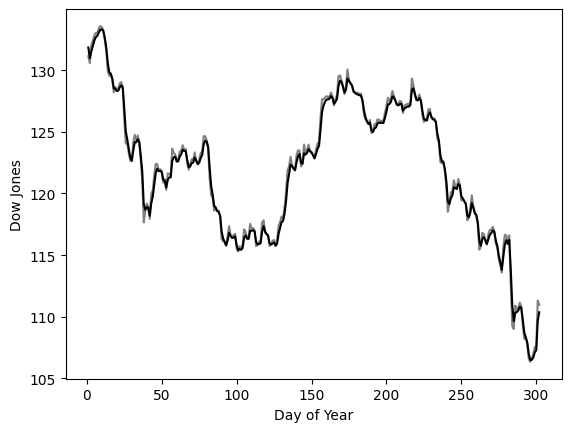

In [45]:
fig, ax = plt.subplots()
ax.plot(results['t'], results['y_t'], color='grey')
ax.plot(results['t'], results['mu_t'], color='black')
ax.set_ylabel('Dow Jones')
ax.set_xlabel('Day of Year')
plt.show()